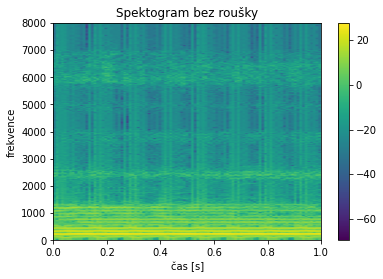

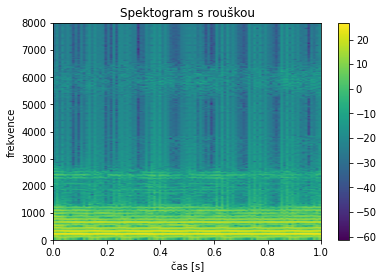

In [23]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
import copy
from scipy import signal
##UKOL 5-8

data,fs=sf.read('off.wav')
#data=(data-np.average(data))
data-=np.mean(data)

data1,fs=sf.read('on.wav')
data1-=np.mean(data1)

counter=0
x=[]
for i in range(0,99):
    y=[]
    for j in range(0,320):
        y.append(data[j+160*counter])
        #y.append(j+160*counter)
    x.append(y)
    counter=counter+1
counter=0
x2=[]
for i in range(0,99):
    y=[]
    for j in range(0,320):
        y.append(data1[j+160*counter])
        #y.append(j+160*counter)
    x2.append(y)
    counter=counter+1
                        
def dft(x):
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape((N,1))
    SUM=np.exp(-2j*np.pi*k*n/N)
    return np.dot(SUM,x)      
zlog=[]
zlog512=[]
zlog_2=[]
zlog512_2=[]
pom=[]
pom_2=[]
puleni=[]
puleni_2=[]
for i in range(0,99):
    x[i]=np.pad(x[i],(704,0),'constant',constant_values=(0))
    x2[i]=np.pad(x2[i],(704,0),'constant',constant_values=(0))
    pom.append(dft(x[i]))
    pom_2.append(dft(x2[i]))
    zlog.append(10*np.log10(abs(pom[i]+1e-20)**2))
    zlog_2.append(10*np.log10(abs(pom_2[i]+1e-20)**2))

    
for i in range(99):
    for j in range(512):
        puleni.append(zlog[i][j])
        puleni_2.append(zlog_2[i][j])
    zlog512.append(puleni)
    zlog512_2.append(puleni_2)
    puleni=[]
    puleni_2=[]
    
plt.subplot(111)
plt.title("Spektogram bez roušky")
plt.imshow(np.rot90(zlog512,1),extent=(0,1,0,8000),aspect='auto')
plt.xlabel('čas [s]')
plt.ylabel('frekvence')
plt.colorbar()
plt.show()
plt.subplot(111)
plt.title("Spektogram s rouškou")
plt.imshow(np.rot90(zlog512_2,1),extent=(0,1,0,8000),aspect='auto')
plt.xlabel('čas [s]')
plt.ylabel('frekvence')
plt.colorbar()
plt.show()



(-0.041615826711212646-0.5207867997519487j)


/home/xsimav01/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


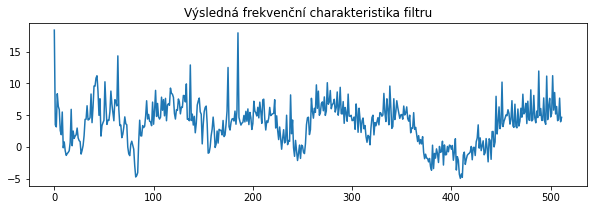

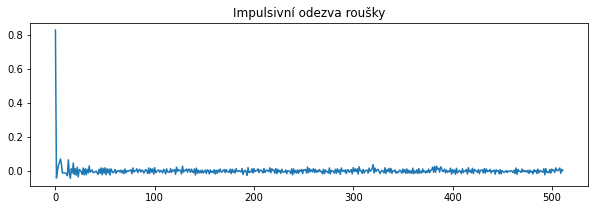

In [24]:
frekchar_pom=[]
frekchar=[]
prumer=0
vyslednachar=[]
impuls=[]
for i in range(99):
    for j in range(512):
        frekchar_pom.append(abs(pom_2[i][j]/pom[i][j])) #maskonn/maskoff
    frekchar.append(frekchar_pom) 
    frekchar_pom=[]
for j in range(512):
    for i in range(99):
        prumer=prumer+frekchar[i][j]
    prumer=prumer/99
    impuls.append(prumer)
    prumer=10*np.log10(abs(prumer+1e-20)**2)
    vyslednachar.append(prumer)
    prumer=0
    
plt.figure(figsize=(10,3))
plt.title("Výsledná frekvenční charakteristika filtru")
plt.plot(vyslednachar)

def idft(x):
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape((N,1))
    SUM=np.exp(2j*np.pi*k*n/N)
    return np.dot(SUM/N,x)     


impuls=np.pad(impuls,(512,0),'constant',constant_values=(0))

#print(np.allclose(idft(impuls),np.fft.ifft(impuls)))
impuls=idft(impuls)
impuls_print=[]
for j in range(512):
    impuls_print.append(impuls[j])
    
plt.figure(figsize=(10,3))
print(impuls[1])
plt.title("Impulsivní odezva roušky")
plt.plot(impuls_print)

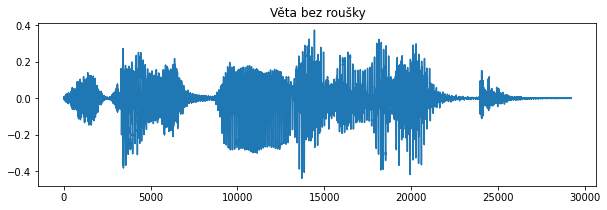

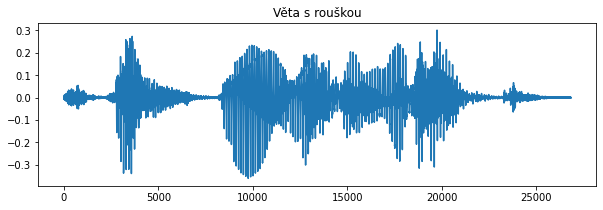

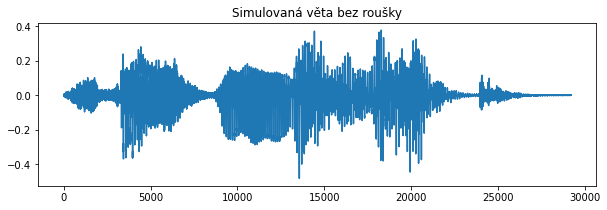

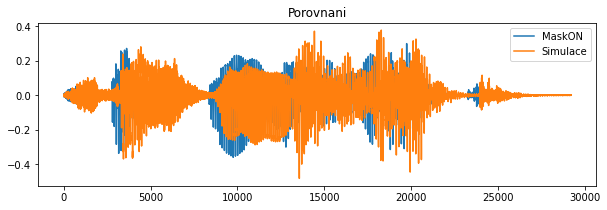

In [25]:
sentenceoff,fs1=sf.read('maskoff_sentence.wav')
sentenceon,fs2=sf.read('maskon_sentence.wav')
toneoff,fs3=sf.read('maskoff_tone.wav')


sentenceoff_simul=signal.lfilter(impuls.real,1,sentenceoff)
toneoff_simul=signal.lfilter(impuls.real,1,toneoff)
plt.figure(figsize=(10,3))
plt.title("Věta bez roušky")
plt.plot(sentenceoff,label="MaskOFF")


plt.figure(figsize=(10,3))
plt.title("Věta s rouškou")
plt.plot(sentenceon,label="MaskON")

plt.figure(figsize=(10,3))
plt.title("Simulovaná věta bez roušky")
plt.plot(sentenceoff_simul,label="Simulace")
         
plt.figure(figsize=(10,3))
plt.title("Porovnani")
plt.plot(sentenceon,label="MaskON")
plt.plot(sentenceoff_simul,label="Simulace")

plt.legend()    
sf.write('sim_maskon_sentence.wav',sentenceoff_simul,fs1)
sf.write('sim_maskon_tone.wav',toneoff_simul,fs3)